In [1]:
import matplotlib.pylab as plt
import jax.numpy as jnp
import numpy as np

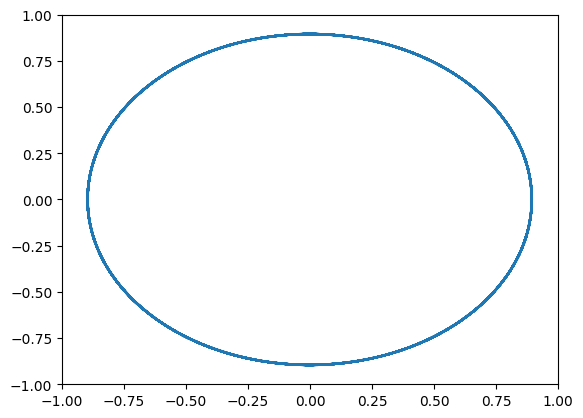

In [2]:
# Define the file name where the data is stored
file_name = f'output.txt'

# Initialize empty lists to store the separated columns
list1 = []
list2 = []

list3 = []
list4 = []

# Open the file for reading
with open(file_name, 'r') as file:
    # Read the first line (column headers) and discard it
    file.readline()

    # Read the data row by row
    for line in file:
        # Split the line into columns using tab as the delimiter
        columns = line.strip().split('\t')

        # Convert each column to the appropriate data type and append to the respective lists
        list1.append(float(columns[0]))
        list2.append(float(columns[1]))
        list3.append(float(columns[2]))
        list4.append(float(columns[3]))


plt.plot(np.sqrt(list1) * np.cos(list2), np.sqrt(list1) * np.sin(list2))

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()
plt.close()


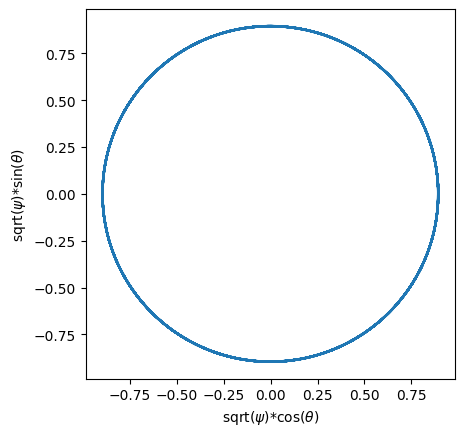

In [3]:
fig, ax = plt.subplots()

#create simple line plot

ax.plot(np.sqrt(list1) * np.cos(list2), np.sqrt(list1) * np.sin(list2))

#set aspect ratio to 1
ratio = 1.0
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect("equal", adjustable='box')

plt.xlabel(r'sqrt($\psi$)*cos($\theta$)')
plt.ylabel(r'sqrt($\psi$)*sin($\theta$)')

#plt.title(rf'E = {E_}, q/m = {q_}/{m_}, $\Delta$t = [{t_i}, {t_f}], nt = {nt_}, x$_i$ = [{psi_i:.2f}, {theta_i:.2f}, {zeta_i:.2f}], v$_\%$ = {vpar_i_ratio:.2f}')
plt.show()

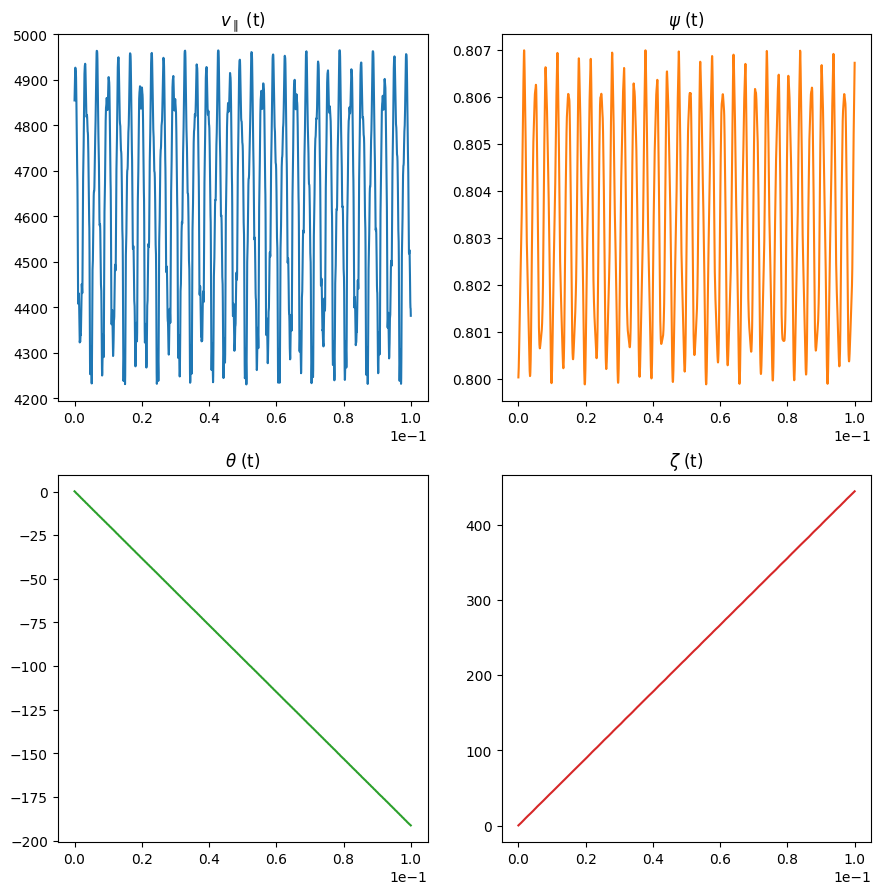

In [4]:
t = np.linspace(0, 0.1, 1999)

fig, axs = plt.subplots(2, 2)
axs[0, 1].plot(t, list1, 'tab:orange')
axs[0, 1].set_title(r'$\psi$ (t)')
axs[1, 0].plot(t, list2, 'tab:green')
axs[1, 0].set_title(r'$\theta$ (t)')
axs[1, 1].plot(t, list3, 'tab:red')
axs[1, 1].set_title(r'$\zeta$ (t)')
axs[0, 0].plot(t, list4, 'tab:blue')
axs[0, 0].set_title(r"$v_{\parallel}$ (t)")

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
axs[0, 0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[1, 0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[1, 1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[0, 1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [12]:
from desc.grid import Grid
import desc.io
from desc.plotting import plot_3d, plot_surfaces
eq = desc.io.load("DESC_ellipse.vacuum.0609.a_fixed_bdry_L_15_M_15_N_15_nfev_300_Mgrid_26_ftol_1e-4.h5")[-1]
eq._iota = eq.get_profile("iota").to_powerseries(order=eq.L, sym=True)
eq._current = None


(<Figure size 1152x960 with 6 Axes>,
 array([<Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.167$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.333$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.500$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.667$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.833$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

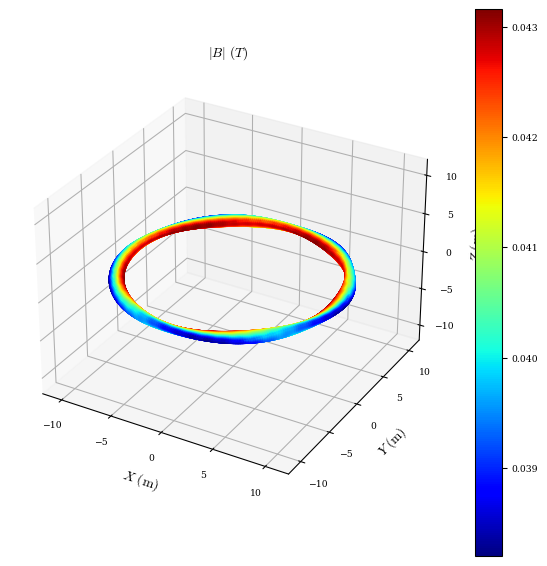

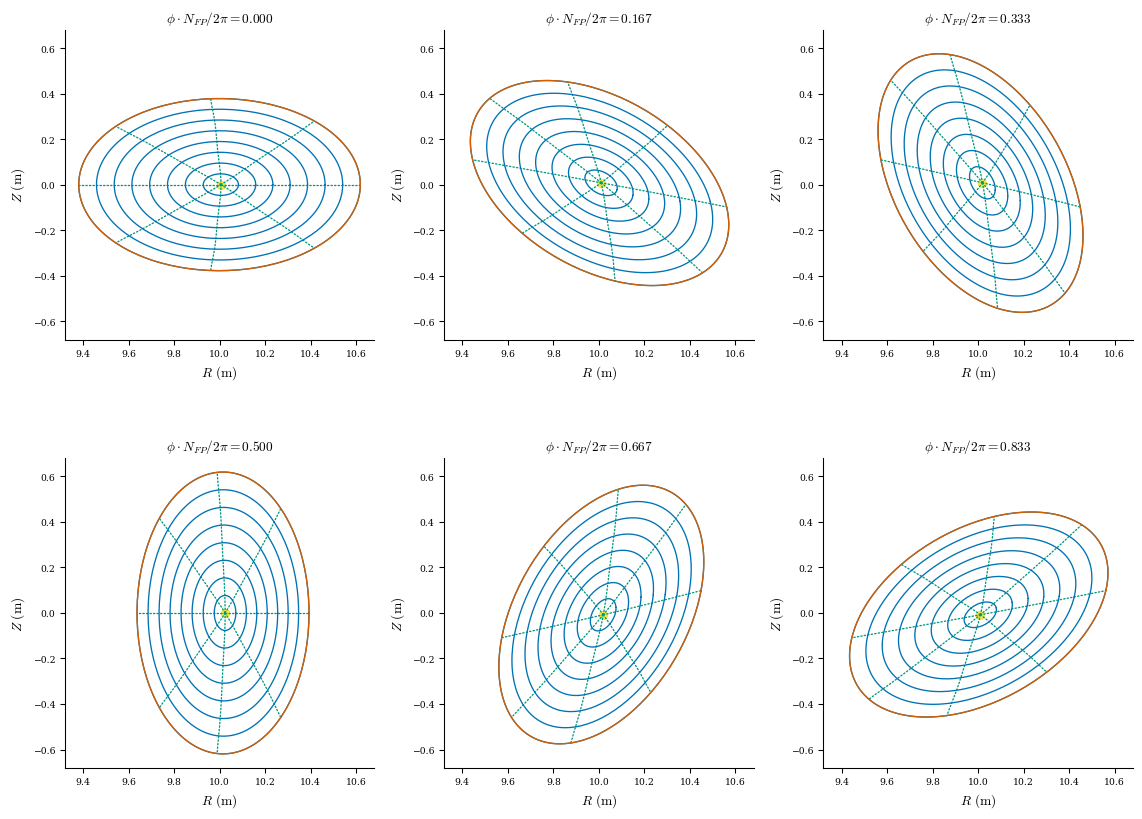

In [10]:

t = np.linspace(0, 0.1, 1999)

mu = 5.98826808e13
m = 1.673e-27

list1 = np.asarray(list1)
list2 = np.asarray(list2)
list3 = np.asarray(list3)
list4 = np.asarray(list4)

grid = Grid(np.vstack((np.sqrt(list1), list2, list3)).T,sort=False)

plot_3d(eq, "B")
plot_surfaces(eq)




(<Figure size 576x576 with 2 Axes>,
 <Axes3D: title={'center': '$|B|~(T)$'}, xlabel='$X ~(\\mathrm{m})$', ylabel='$Y ~(\\mathrm{m})$', zlabel='$Z ~(\\mathrm{m})$'>)

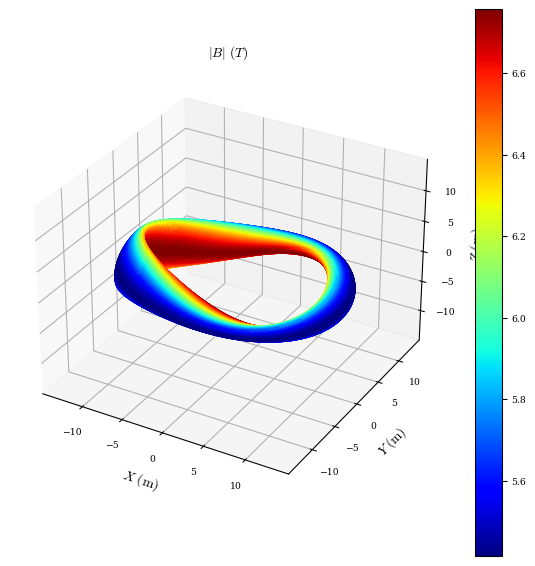

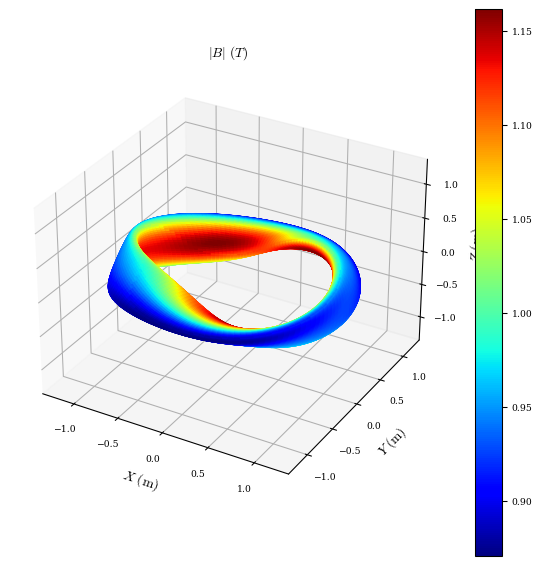

In [6]:
eq = desc.io.load("input.LandremanPaul2021_QA_scaled_output.h5")[-1]
eq._iota = eq.get_profile("iota").to_powerseries(order=eq.L, sym=True)
eq._current = None
eq2 = desc.io.load("input.final_freeb_output.h5")[-1]
eq2._iota = eq.get_profile("iota").to_powerseries(order=eq.L, sym=True)
eq2._current = None

plot_3d(eq, "B")
plot_3d(eq2, "B")